# Algerian Forest Fires Dataset Project

## Libraries Installation using pip

In [ ]:
'''
pip install -U scikit-learn
pip install dx
pip install sweetviz
pip install graphviz
...
'''

## Libraries Importation

In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import sweetviz as sv


## Explatory Data Analysis
> <b>Importing & displaying the raw dataset </b>

In [162]:
raw= pd.read_csv('./datasets/Algerian_forest_fires_df.csv')
raw

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


> <b>Displaying the dataset columns</b>

In [163]:
raw.columns

Index(['Bejaia Region Dataset '], dtype='object')

> <b>Fixing the dataset headers</b>

In [164]:
df= pd.read_csv('./datasets/Algerian_forest_fires_df.csv',header=[1])
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


> <b>fixed dataset columns</b>

In [165]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

> <b>Removing the whitespace from the start and the end of the columns headers</b>

In [166]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

> <b>Displaying the first region</b>

In [167]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire


> <b>Displaying the second region</b>

In [168]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


> <b>Adding New column Region</b>

In [169]:
# 1 : "Bejaia Region Dataset"
# 2 : "Sidi-Bel Abbes Region Dataset"
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2

In [170]:
df.Region.dtype

dtype('float64')

> <b>Fixing the new column data type</b>

In [171]:
df[['Region']] = df[['Region']].astype(int)

>  <b> Summing the null values  </b>

In [172]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [173]:
df.loc[df['Region'] == 2]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


> <b> Dropping the region raw & redundant headers </b>

In [174]:
df = df.drop(122)
df = df.drop(123)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [175]:
df[121:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,1
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


>  <b>Reseting the observation indexes</b>

In [176]:
df= df.reset_index(drop=True)
df[121:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,1
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


> <b>No nulls values in the dataset (1 in Classes -> Covering it in the next chunks)</b>

In [177]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

 <b> The dataset Overview  </b> : <br>
> - The number of observation & attributes
> - The dataset type
> - the dataset dimension

In [178]:
print("The dataset shape: ",df.shape)

The dataset shape:  (244, 15)


In [179]:
print("Type of the dataset: ",type(df))

Type of the dataset:  <class 'pandas.core.frame.DataFrame'>


In [180]:
print("The number of dimensions: ",df.ndim)

The number of dimensions:  2


> <b> The observation with the NaN value on the 'Classes' attribute </b>

In [201]:
df.loc[165]

day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC                14.6
ISI                  9
BUI               12.5
FWI               10.4
Classes        fire   
Region               2
Name: 165, dtype: object

> <b> DC,ISI,BUI,FWI,Classes values shifting </b>

In [205]:
shift = df.iloc[165]['DC'].split(' ')
df.loc[165,'DC']=shift[0]
permutation = df.loc[165,'ISI']
df.loc[165,'ISI'] = shift[1]
permutation2 = df.loc[165,'BUI']
df.loc[165,'BUI'] = permutation
permutation3 = df.loc[165,'FWI']
df.loc[165,'FWI']= permutation2
df.loc[165,'Classes']= permutation3

IndexError: list index out of range

> <b> Fixed Observation </b>

In [ ]:
df.loc[165]

> <b> No null values in the dataset </b>

In [209]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

> <b> The columns misdatatyping </b>

In [212]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

> <b> Fixing The columns data type </b>

In [213]:
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)
# it is more memory efficient to use shorter integer/float numbers when handling a large dataset. 

> <b> Fixed columns data type </b>

In [31]:
print("The attribute types: ")
print(df.dtypes)

The attribute types: 
day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object


> <b> Displaying the first 5 observation of the dataset </b>

In [214]:
print(df.head(5))

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          1  
1  0.4  not fire          1  
2  0.1  not fire          1  
3  0.0  not fire          1  
4  0.5  not fire          1  


> <b> Displaying the last 5 observation of the dataset </b>

In [216]:
print(df.tail())

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
239   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
240   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
241   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
242   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
243   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI       Classes  Region  
239  6.5       fire          2  
240  0.0   not fire          2  
241  0.2   not fire          2  
242  0.7   not fire          2  
243  0.5  not fire           2  


> <b> The number of unique values of every attributes. </b>

In [218]:
df.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            173
FWI            126
Classes          8
Region           2
dtype: int64

In [219]:
df['month'].unique()

array([6, 7, 8, 9])

In [220]:
df['year'].unique()

array([2012])

> <b> Fixing the uniqueness of the attributes 'Classes' by removing the whitespace from its observations values </b>

In [225]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [226]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

> <b> Exporting the clean datasets </b>

In [227]:
df.to_csv('./datasets/Algerian_forest_fires_df_cleaned.csv')

In [43]:
def plot_boxplot(df, ft):
    df.boxplot(column=ft)
    plt.grid(False)
    plt.show()


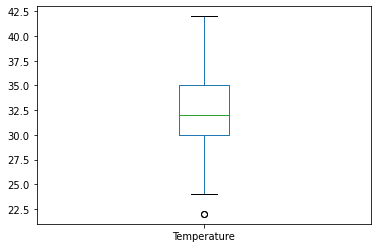

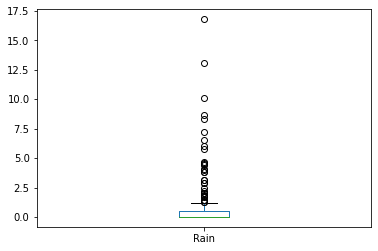

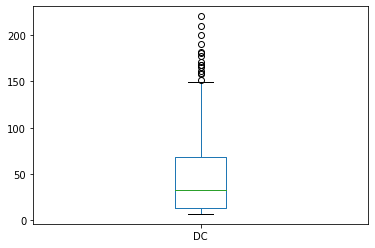

In [44]:
plot_boxplot(df,["Temperature"])
plot_boxplot(df,["Rain"])
plot_boxplot(df,["DC"])

In [229]:
conditions = [
    (df['Classes'] == 'fire'),
    (df['Classes'] == 'not fire'),
    ]
values = [1,0]
df['Class'] = np.select(conditions, values)
df['Class'].dtypes

dtype('int32')

In [46]:
my_report = sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [50]:
my_report.show_html('./reports/df_report.html', open_browser=False)

Report ./reports/df_report.html was generated.


In [238]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [239]:
X = df[['day','month','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region']]
y = df[['Class']]

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 22) #, random_state = 22

In [96]:
len(X_train)

170

In [97]:
len(X_test)

74

In [241]:
X_train

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
77,17,8,37,52,18,0.0,89.3,16.0,100.7,9.7,22.9,14.6,1
181,30,7,36,56,16,0.0,88.9,23.8,57.1,8.2,23.8,13.2,2
37,8,7,33,68,19,0.0,85.6,12.5,49.8,6.0,15.4,8.0,1
118,27,9,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,1
99,8,9,30,73,17,0.9,62.0,2.6,8.4,1.1,3.0,0.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,9,9,30,77,15,1.0,56.1,2.1,8.4,0.7,2.6,0.2,1
192,10,8,39,39,15,0.2,89.3,15.8,35.4,8.2,15.8,10.7,2
44,15,7,30,80,19,0.4,60.7,5.2,17.0,1.1,5.9,0.5,1
132,11,6,31,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,2


In [99]:
compare_report = sv.compare([X_train,'Train'],[X_test,'Test'])
compare_report.show_html('./reports/compare.html', open_browser=False)

                                             |                                             | [  0%]   00:00 ->…

Report ./reports/compare.html was generated.


In [242]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

C:\Users\Ayman\AppData\Local\Temp/ipykernel_13040/3950815144.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestClassifier()

In [243]:
model.fit(X_train,y_train.values.ravel())
#values will give the values in an array. (shape: (n,1)
#ravel will convert that array shape to (n, )
y_train.values.ravel()

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [244]:
model.score(X_test,y_test)

0.9594594594594594

In [245]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [246]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        31
           1       1.00      0.93      0.96        43

    accuracy                           0.96        74
   macro avg       0.96      0.97      0.96        74
weighted avg       0.96      0.96      0.96        74



Text(55.0, 0.5, 'Truth')

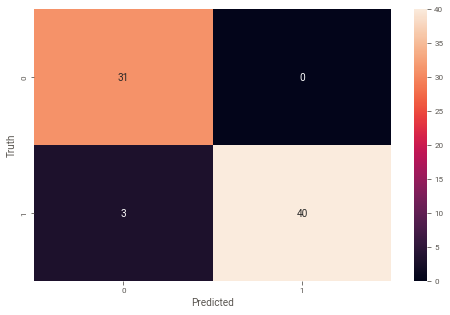

In [247]:
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# SVM is better suited in case of data with large feature space and lesser observations
#if the training data is smaller or if the dataset has a fewer number of observations and a higher number of features 
#like genetics or textual data, choose algorithms with high bias/low variance like Linear regression, Naïve Bayes, or Linear SVM.

In [248]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(X_train,y_train.values.ravel())

SVC()

In [249]:
model2.score(X_test,y_test)

0.918918918918919

In [250]:
y_pred2 = model2.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        31
           1       0.88      1.00      0.93        43

    accuracy                           0.92        74
   macro avg       0.94      0.90      0.91        74
weighted avg       0.93      0.92      0.92        74



Text(55.0, 0.5, 'Truth')

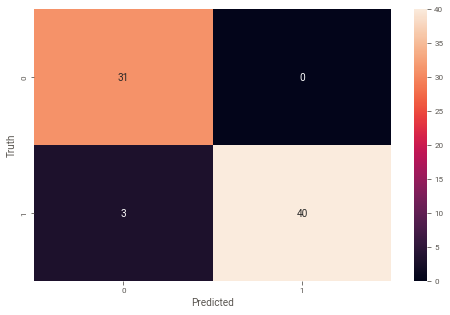

In [251]:
plt.figure(figsize=(8,5))
sns.heatmap(cm2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')